# FP Growth algorithm  
Goal : To find next buyed product

* Steps
  1) Frequent pattern set : Set of repation data
  2) Ordered-item set
  3) Condiational frequent patter tree is built
  4) Frequent pattern rules

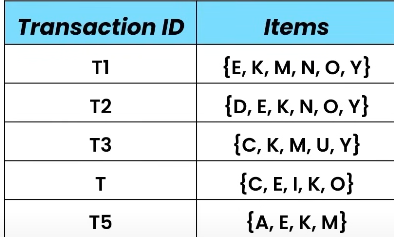

* **First we will find out freqency patter set**
* 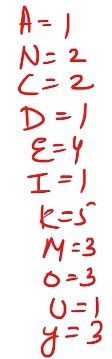
* Deside min_support = 3
  * theirfore - k,e,m,o,y

**Finding Ordered-Items set**
* write order items in this order 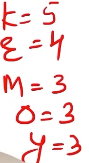
* i.e 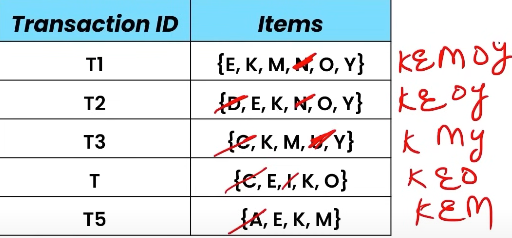
* 

**Building tree**
* For first T1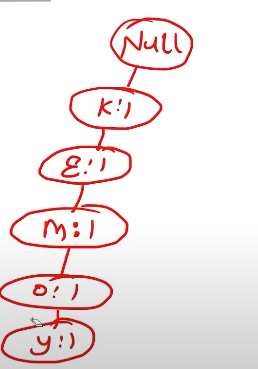
* Then for rest all just keep increasing item values which is stated one above and conect to the tree it if not avaibale in order
* 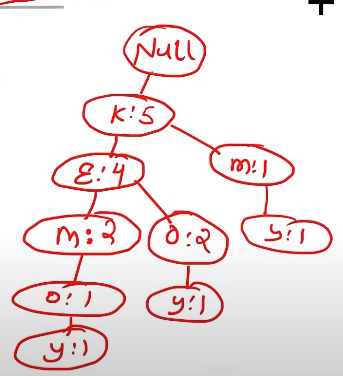

**Pattern Rules**
* 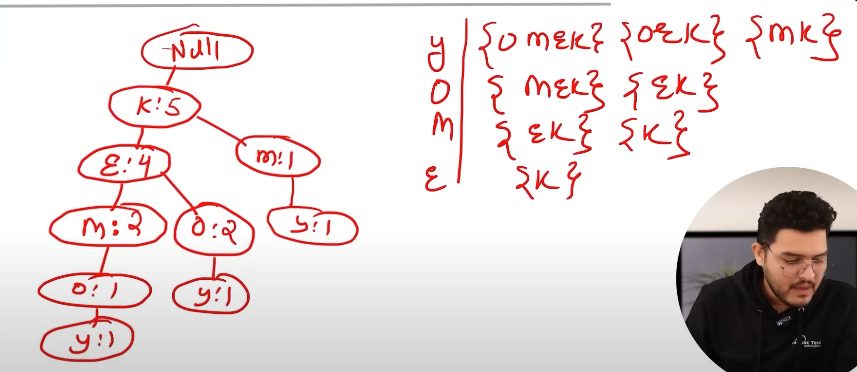
* Now find common terms and pattern
* 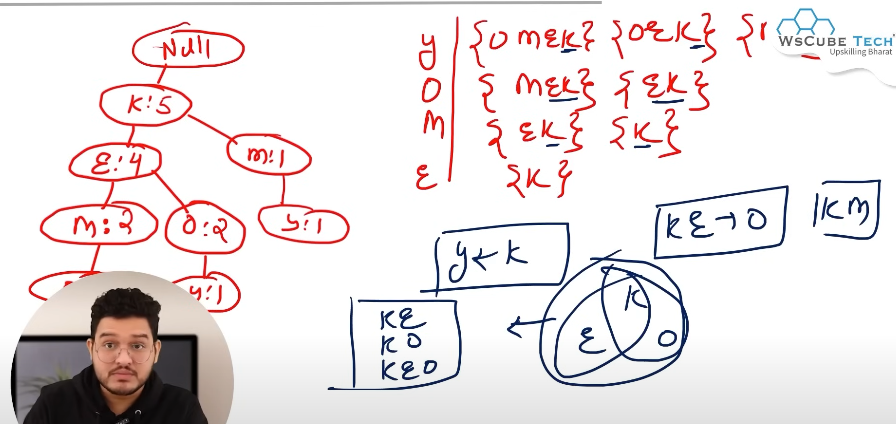

In [1]:
import pandas as pd

In [5]:
pd.set_option('display.max_rows', 500)

In [6]:
data = pd.read_csv(r"D:\Data Science\Datasets\groceries - groceries.csv")

In [7]:
data.head(3)

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
market = []
for i in range(0,data.shape[0]):
    cus = []
    for j in data.columns :
        if type(data[j][i]) == str:
            cus.append(data[j][i])
    market.append(cus) #This will have list undet list

In [11]:
import collections

In [12]:
import numpy as np

In [13]:
single_list = []
for i in market:
    for j in i:
        single_list.append(j)

In [14]:
p = collections.Counter(single_list)

In [15]:
d = {'Item Names': p.keys(), 'Values': p.values()}

In [16]:
pd.DataFrame(d).sort_values(by = ['Values'], ascending = False)

,Item Names,Values
7,whole milk,2513
11,other vegetables,1903
17,rolls/buns,1809
31,soda,1715
5,yogurt,1372
24,bottled water,1087
42,root vegetables,1072
4,tropical fruit,1032
52,shopping bags,969
50,sausage,924


In [17]:
from mlxtend.preprocessing.transactionencoder import TransactionEncoder

In [18]:
tr = TransactionEncoder()
tr.fit(market)

TransactionEncoder()

In [19]:
tr.transform(market)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [20]:
df = pd.DataFrame(tr.transform(market), columns = tr.columns_)

In [22]:
from mlxtend.frequent_patterns import fpgrowth

In [25]:
fpgrowth(df, min_support=0.07, use_colnames=True, max_len=3).sort_values(by='support')

,support,itemsets
17,0.071683,(whipped/sour cream)
11,0.072293,(fruit/vegetable juice)
18,0.074835,"(whole milk, other vegetables)"
4,0.075648,(pip fruit)
14,0.077682,(canned beer)
10,0.079817,(newspapers)
7,0.080529,(bottled beer)
0,0.082766,(citrus fruit)
12,0.088968,(pastry)
15,0.093950,(sausage)
